In [1]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from nltk.probability import FreqDist
from nltk import ngrams

# data load


In [2]:
df = pd.read_excel('data.xlsx')
print("shape++>",df.iloc[:,1:3].shape)
df.iloc[:,1:3].head() 

shape++> (202, 2)


,classes,sentence
0,headche,Doctor I feel weak and do not feel like eating
1,headche,I feel like vomiting
2,headche,Do you drink a lot of water?
3,headche,"No Doctor, I don’t have water too much"
4,headche,Did you took any medicine?


# bar plot

[43, 42, 54, 63]


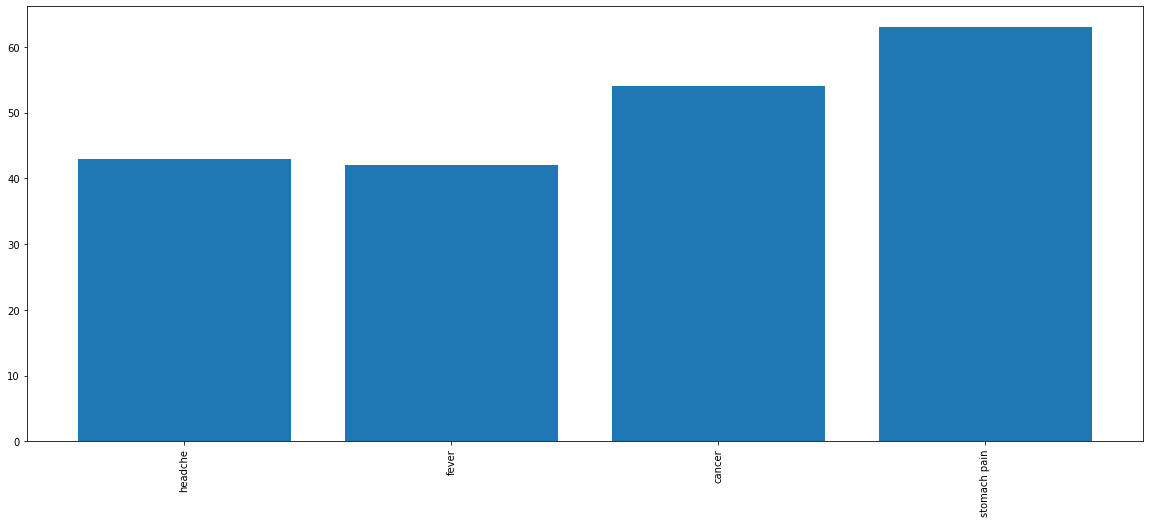

In [3]:
classes=df["classes"]
cls=classes.unique()
freq=classes.value_counts()
# print(freq)
len_class=[]
for x in cls:
#     print(x)
    len_class.append(freq[x])
print(len_class)
plt.figure(figsize=(20,8))
plt.bar(cls,len_class)
plt.xticks(rotation=90)
plt.show()

# tokenize And POS

In [4]:
# nltk.download('averaged_perceptron_tagger')
data=df.iloc[:,2:3]
# print(data)
allToken=""
for i in range(len(data)):
    
    allToken=allToken+df.iloc[i,2:3][0]
    tokenize=nltk.word_tokenize(allToken)
    pos=nltk.pos_tag(tokenize)
print("Tokenization",tokenize[0:10])
print("POS Tagging",pos[0:10])

Tokenization ['Doctor', 'I', 'feel', 'weak', 'and', 'do', 'not', 'feel', 'like', 'eatingI']
POS Tagging [('Doctor', 'NN'), ('I', 'PRP'), ('feel', 'VBP'), ('weak', 'JJ'), ('and', 'CC'), ('do', 'VBP'), ('not', 'RB'), ('feel', 'VB'), ('like', 'IN'), ('eatingI', 'JJ')]


# freq and non freq

In [5]:

fdist = FreqDist(tokenize)

common=fdist.most_common()
most=common[0:10]
less=common[-10:-1]
print("MOST FREQ++>",most)
print("LESS FREQ++>",less)

MOST FREQ++> [('the', 69), ('a', 47), ('you', 44), ('to', 44), ('of', 37), ('have', 34), ('and', 33), (',', 33), ('’', 29), ('your', 28)]
LESS FREQ++> [('trigger', 1), ('feeling', 1), ('stressDoctor', 1), ('eating', 1), ('vomiting', 1), ('reliefTemperature', 1), ('painSaridon', 1), ('diarrheaI', 1), ('acheThe', 1)]


# make your own stop word

In [6]:
mystop_words =open("stopword.txt","r")
mystop_words=mystop_words.read()
mystop_words=mystop_words.split("\n")
print("MY STOP WORDS===>",mystop_words)
word_tokens = word_tokenize(allToken)
filtered_sentence = [w for w in word_tokens if w.lower() in mystop_words]
filtered_sentence = []
for w in word_tokens:
	if w not in mystop_words:
		filtered_sentence.append(w)
print("length of unfiltered data===> ",len(word_tokens))        
print("length of filtered data===> ",len(filtered_sentence))

MY STOP WORDS===> ['or', 'the', 'should', 'is', 'just', 'only', 've', 't', 'some', 'be', 'between', 'a', 'not', 'on', 'all', 'through', 'you', 'been', 'am', 'was', 'they', 'but', 'had', 'and', 'have', 'with', 'an', 'll', 's', 'having', 'does', 'up', 'to', 'in', 'under', 'we', 'after', 'do', 'few', 'as', 'me', 'did', 'there', 'this', 'he', 'how', 'can', 'other', 'before', 'by', 'at', 'when', 'hasn', 'don', 'has', 'over', 'any', 'will', 'from', 'if', 'your', 'of', 'm', 'it', 'for', 'so', 'that', 'which', 'my', 'too', 'are', '']
length of unfiltered data===>  1712
length of filtered data===>  984



# word cloud

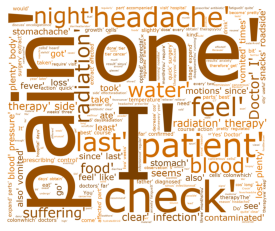

In [7]:
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(180.0 * 45.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)
wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Verdana.ttf',
                            stopwords = mystop_words,
                            background_color = 'white',
                            width = 1200,
                            height = 1000,
                            color_func = random_color_func
                            ).generate(str(filtered_sentence))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Ngram

In [8]:
#Unigram 
Unigrams = ngrams(filtered_sentence, 1)
#Bigram 
Bigrams = ngrams(filtered_sentence, 2)
#trigram
trigrams=ngrams(filtered_sentence, 3)
print("\nUnigram==>\n")
for item in Unigrams:
    print(item,end="")
print("\nBigram==>")
for item in Bigrams:
    print(item,end="")    
print("\nTrigram==>")
for item in trigrams:
    print(item,end="")


Unigram==>

('Doctor',)('I',)('feel',)('weak',)('feel',)('like',)('eatingI',)('feel',)('like',)('vomitingDo',)('drink',)('lot',)('water',)('?',)('No',)('Doctor',)(',',)('I',)('’',)('water',)('much',)('Did',)('took',)('medicine',)('?',)('Yes',)('Doctor',)(',',)('I',)('took',)('Crocin',)('Because',)('I',)('felt',)('headache',)('Do',)('need',)('quick',)('reliefGood',)('morning',)('!',)('You',)('seem',)('pale',)('voice',)('sounds',)('different',)('Yes',)('doctor',)('I',)('’',)('temperature',)('even',)('sore',)('throatYou',)('moderate',)('feverLet',)('check',)('temperatureThis',)('thermometer',)('different',)('last',)('one',)('usedNow',)('removed',)('thermometerTemperature',)('high',)(',',)('around',)('99',)('8Let',)('check',)('blood',)('pressure',)('wellYour',)('blood',)('pressure',)('fine',)('It',)('seems',)('bit',)('scruffyDo',)('sweat',)('shiverI',)('feel',)('slightly',)('cold',)('I',)('sit',)('fanYou',)('signs',)('malariaI',)('would',)('recommend',)('undergo',)('blood',)('testthere',)

('Doctor', 'I')('I', 'feel')('feel', 'weak')('weak', 'feel')('feel', 'like')('like', 'eatingI')('eatingI', 'feel')('feel', 'like')('like', 'vomitingDo')('vomitingDo', 'drink')('drink', 'lot')('lot', 'water')('water', '?')('?', 'No')('No', 'Doctor')('Doctor', ',')(',', 'I')('I', '’')('’', 'water')('water', 'much')('much', 'Did')('Did', 'took')('took', 'medicine')('medicine', '?')('?', 'Yes')('Yes', 'Doctor')('Doctor', ',')(',', 'I')('I', 'took')('took', 'Crocin')('Crocin', 'Because')('Because', 'I')('I', 'felt')('felt', 'headache')('headache', 'Do')('Do', 'need')('need', 'quick')('quick', 'reliefGood')('reliefGood', 'morning')('morning', '!')('!', 'You')('You', 'seem')('seem', 'pale')('pale', 'voice')('voice', 'sounds')('sounds', 'different')('different', 'Yes')('Yes', 'doctor')('doctor', 'I')('I', '’')('’', 'temperature')('temperature', 'even')('even', 'sore')('sore', 'throatYou')('throatYou', 'moderate')('moderate', 'feverLet')('feverLet', 'check')('check', 'temperatureThis')('tempera

('Doctor', 'I', 'feel')('I', 'feel', 'weak')('feel', 'weak', 'feel')('weak', 'feel', 'like')('feel', 'like', 'eatingI')('like', 'eatingI', 'feel')('eatingI', 'feel', 'like')('feel', 'like', 'vomitingDo')('like', 'vomitingDo', 'drink')('vomitingDo', 'drink', 'lot')('drink', 'lot', 'water')('lot', 'water', '?')('water', '?', 'No')('?', 'No', 'Doctor')('No', 'Doctor', ',')('Doctor', ',', 'I')(',', 'I', '’')('I', '’', 'water')('’', 'water', 'much')('water', 'much', 'Did')('much', 'Did', 'took')('Did', 'took', 'medicine')('took', 'medicine', '?')('medicine', '?', 'Yes')('?', 'Yes', 'Doctor')('Yes', 'Doctor', ',')('Doctor', ',', 'I')(',', 'I', 'took')('I', 'took', 'Crocin')('took', 'Crocin', 'Because')('Crocin', 'Because', 'I')('Because', 'I', 'felt')('I', 'felt', 'headache')('felt', 'headache', 'Do')('headache', 'Do', 'need')('Do', 'need', 'quick')('need', 'quick', 'reliefGood')('quick', 'reliefGood', 'morning')('reliefGood', 'morning', '!')('morning', '!', 'You')('!', 'You', 'seem')('You',

# naive bayes

In [9]:

X_train, X_test, y_train, y_test = train_test_split(df['sentence'], df['classes'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

# Pridiction

In [10]:
print(clf.predict(count_vect.transform(["body temperature is high"])))

['fever']


# word similarity

In [11]:
from gensim.models import Word2Vec
model = Word2Vec(tokenize,epochs=5)
content =df["sentence"]
sentences = []
for x in content:
    nltk_tokens = nltk.word_tokenize(x)
    sentences.append(nltk_tokens)
model = Word2Vec(sentences, min_count=1)
print(model.wv.most_similar('pain'))

[('clear', 0.3343639671802521), ('migraine', 0.31374895572662354), ('think', 0.301779180765152), ('this', 0.294569730758667), ('had', 0.2888350188732147), ('irritation', 0.24109108746051788), ('you', 0.23753006756305695), ('between', 0.23678745329380035), ('powder', 0.23663386702537537), ('It', 0.23642008006572723)]
